### 数据预处理
 - 数据质量：缺失值处理、异常处理、重复数据
 - 数据结构：格式转化、数据合并

### 1. 删除重复数据，并输出去重前后的数据量
### 2. 缺失值处理
- 首先，去掉 gravatar_id 列，并查看各列的缺失值的情况
- 其次，将可转化成 boolean 变量的列字段转化成 boolean 变量（转成布尔类型是为了便于处理缺失字段，如是否存在公司、位置等等），文本数据用空字符串填充空值......
- 最后，再次看各列有无缺失值
### 3. 数据变换，将created_at、updated_at转为时间戳
### 4. 数据可视化
- 4.1 可视化bot和hunman类型的情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.2 可视化bot类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.3 可视化human类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.4 可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.5 可视化human类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

In [4]:
import pandas as pd
raw_data = pd.read_csv('data/github_bot_raw_data.csv') 
#列字段解读
columns = [
    'actor_id',  # GitHub用户的ID (示例值: 1081405)
    'label',  # 用户标签（"Human"或"Bot"） (示例值: Human)
    'login',  # GitHub用户的登录名 (示例值: dlazesz)
    'id',  # 用户的GitHub ID (示例值: 1081405)
    'node_id',  # 用户的GitHub节点ID (示例值: MDQ6VXNlcjEwODE0MDU=)
    'avatar_url',  # GitHub头像URL (示例值: https://avatars.githubusercontent.com/u/1081405?v=4)
    'gravatar_id',  # Gravatar ID (示例值: None)
    'url',  # GitHub用户的URL (示例值: https://api.github.com/users/dlazesz)
    'html_url',  # GitHub用户的HTML URL (示例值: https://github.com/dlazesz)
    'followers_url',  # GitHub用户的粉丝URL (示例值: https://api.github.com/users/dlazesz/followers)
    'following_url',  # GitHub用户的关注URL (示例值: https://api.github.com/users/dlazesz/following{/other_user})
    'gists_url',  # 用户的GitHub Gists URL (示例值: https://api.github.com/users/dlazesz/gists{/gist_id})
    'starred_url',  # 用户的GitHub Starred URL (示例值: https://api.github.com/users/dlazesz/starred{/owner}{/repo})
    'subscriptions_url',  # 用户的GitHub订阅URL (示例值: https://api.github.com/users/dlazesz/subscriptions)
    'organizations_url',  # 用户的GitHub组织URL (示例值: https://api.github.com/users/dlazesz/orgs)
    'repos_url',  # 用户的GitHub仓库URL (示例值: https://api.github.com/users/dlazesz/repos)
    'events_url',  # 用户的GitHub事件URL (示例值: https://api.github.com/users/dlazesz/events{/privacy})
    'received_events_url',  # 用户的GitHub接收事件URL (示例值: https://api.github.com/users/dlazesz/received_events)
    'type',  # 用户类型，通常为"User" (示例值: User)
    'site_admin',  # 表示用户是否是GitHub网站管理员的标志 (示例值: False)
    'name',  # 用户的姓名 (示例值: Indig Balázs)
    'company',  # 用户所在公司 (示例值: None)
    'blog',  # 用户的博客 (示例值: None)
    'location',  # 用户的位置 (示例值: None)
    'email',  # 用户的电子邮件 (示例值: None)
    'hireable',  # 表示用户是否愿意被雇佣的标志 (示例值: None)
    'bio',  # 用户在其GitHub资料中提供的自我介绍或个人简介 (示例值: None)
    'twitter_username',  # 用户的Twitter用户名 (示例值: None)
    'public_repos',  # 用户在GitHub上的公共代码仓库数量 (示例值: 26)
    'public_gists',  # 用户的公共Gists数量 (示例值: 1)
    'followers',  # 关注该用户的其他GitHub用户数量 (示例值: 5)
    'following',  # 该用户关注的其他GitHub用户数量 (示例值: 1)
    'created_at',  # 用户的GitHub帐户创建日期 (示例值: 2011-09-26T17:27:03Z)
    'updated_at',  # 用户的GitHub帐户最后更新日期 (示例值: 2023-10-13T11:21:10Z)
]
data = raw_data[columns]

### 1. 删除重复数据，并输出去重前后的数据量

In [5]:
# 删除重复数据
data_cleaned = data.drop_duplicates()

# 输出去重前后的数据量
print("去重前的数据量:", len(data))
print("去重后的数据量:", len(data_cleaned))


去重前的数据量: 20358
去重后的数据量: 19779


### 2. 缺失值处理
- 首先，去掉 gravatar_id 列，并查看各列的缺失值的情况

In [6]:
# 去掉 'gravatar_id' 列
data_cleaned = data_cleaned.drop(columns=['gravatar_id'])

# 查看各列的缺失值情况
missing_values = data_cleaned.isnull().sum()
print("各列的缺失值情况:")
print(missing_values)

各列的缺失值情况:
actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2589
company                 8982
blog                   11263
location                7080
email                  11739
hireable               16481
bio                    10930
twitter_username       14859
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at                 0
dtype: int64


- 其次，将可转化成 boolean 变量的列字段转化成 boolean 变量（转成布尔类型是为了便于处理缺失字段，如是否存在公司、位置等等），文本数据用空字符串填充空值......

In [7]:
# 转换可以转化成布尔类型的列
bool_columns = ['site_admin', 'hireable']  # 例：site_admin 和 hireable 列可以是布尔类型
for col in bool_columns:
    data_cleaned[col] = data_cleaned[col].fillna(False).astype(bool)

# 文本数据用空字符串填充缺失值
text_columns = ['company', 'location', 'bio', 'twitter_username']
for col in text_columns:
    data_cleaned[col] = data_cleaned[col].fillna('')

# 查看处理后的缺失值情况
missing_values_after = data_cleaned.isnull().sum()
print("处理后各列的缺失值情况:")
print(missing_values_after)


处理后各列的缺失值情况:
actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2589
company                    0
blog                   11263
location                   0
email                  11739
hireable                   0
bio                        0
twitter_username           0
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at                 0
dtype: int64


C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_8380\2274201584.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_cleaned[col] = data_cleaned[col].fillna(False).astype(bool)


- 最后，再次看各列有无缺失值

In [8]:
# 再次查看各列是否有缺失值
missing_values_final = data_cleaned.isnull().sum()
print("最终处理后的缺失值情况:")
print(missing_values_final)


最终处理后的缺失值情况:
actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2589
company                    0
blog                   11263
location                   0
email                  11739
hireable                   0
bio                        0
twitter_username           0
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at                 0
dtype: int64


### 3. 数据变换，将created_at、updated_at转为时间戳

In [9]:
# 将 'created_at' 和 'updated_at' 列转换为 datetime 类型
data_cleaned['created_at'] = pd.to_datetime(data_cleaned['created_at'])
data_cleaned['updated_at'] = pd.to_datetime(data_cleaned['updated_at'])

# 将 datetime 类型转换为时间戳
data_cleaned['created_at_timestamp'] = data_cleaned['created_at'].astype(int) / 10**9  # 转换为秒
data_cleaned['updated_at_timestamp'] = data_cleaned['updated_at'].astype(int) / 10**9  # 转换为秒

# 查看转换后的数据
print(data_cleaned[['created_at', 'created_at_timestamp', 'updated_at', 'updated_at_timestamp']].head())


                 created_at  created_at_timestamp                updated_at  \
0 2011-09-26 17:27:03+00:00          1.317058e+09 2023-10-13 11:21:10+00:00   
1 2015-06-29 10:12:46+00:00          1.435573e+09 2023-10-07 06:26:14+00:00   
2 2008-08-29 16:20:03+00:00          1.220027e+09 2023-10-02 02:11:21+00:00   
3 2014-05-20 18:43:09+00:00          1.400611e+09 2023-10-12 12:54:59+00:00   
4 2012-08-16 14:19:13+00:00          1.345127e+09 2023-10-06 11:58:41+00:00   

   updated_at_timestamp  
0          1.697196e+09  
1          1.696660e+09  
2          1.696213e+09  
3          1.697115e+09  
4          1.696594e+09  


### 4. 数据可视化
- 4.1 可视化bot和hunman类型的情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

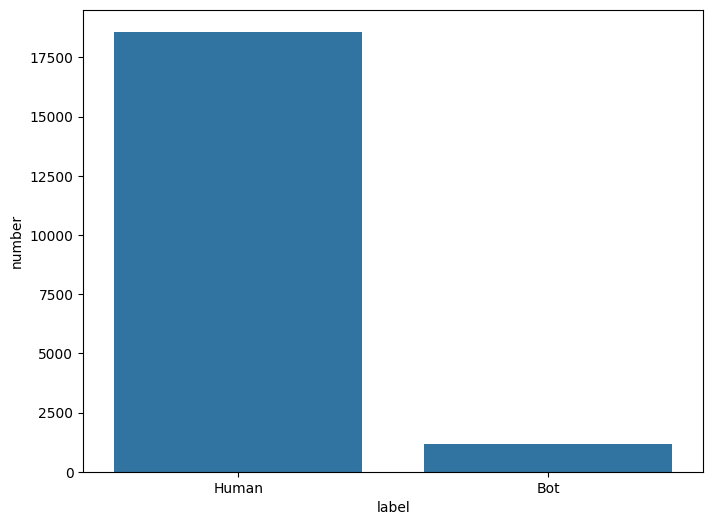

Bot和Human类型的账号数量:
label
Human    18588
Bot       1191
Name: count, dtype: int64


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# 计算每种类型的数量
label_counts = data_cleaned['label'].value_counts()

# 创建条形图
plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xlabel('label')
plt.ylabel('number')
plt.show()

# 输出各类型账号的数量
print("Bot和Human类型的账号数量:")
print(label_counts)


- 条形图适合比较类别数据的数量。通过这个图表可以直观地看到 Bot 和 Human 账号的数量对比。
- 观察条形图中的高度，可以看到 Bot 比 Human 账号数量大十倍以上。
- 可能表明该平台上自动化或脚本驱动的活动很活跃。

- 4.2 可视化bot类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

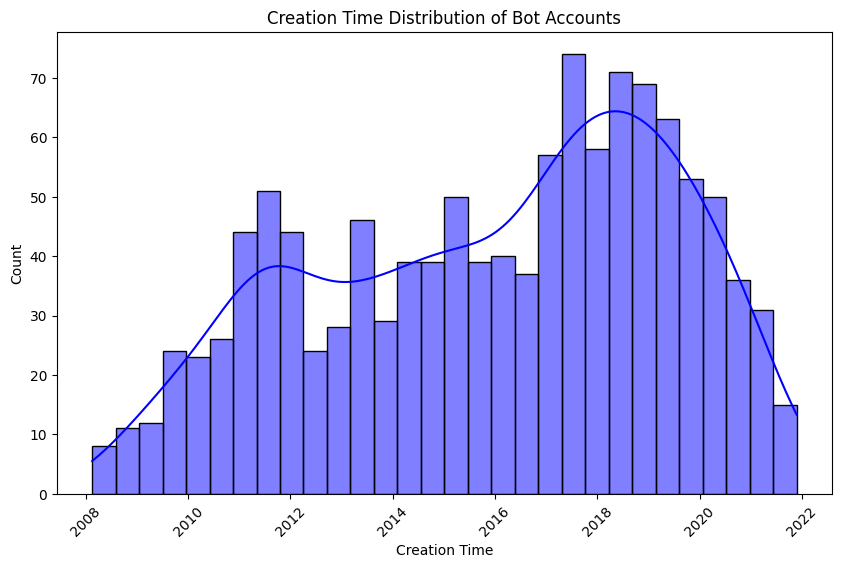

In [19]:
# 筛选出 Bot 类型账号
bot_data = data_cleaned[data_cleaned['label'] == 'Bot']

# 绘制 Bot 类型账号的创建时间分布
plt.figure(figsize=(10, 6))
sns.histplot(bot_data['created_at'], kde=True, bins=30, color='blue')
plt.title('Creation Time Distribution of Bot Accounts')  # 图表标题
plt.xlabel('Creation Time')  # x 轴标签
plt.ylabel('Count')  # y 轴标签
plt.xticks(rotation=45)  # 旋转 x 轴刻度标签
plt.show()

- 通过时间序列分布图 (带核密度估计),可以观察 Bot 账号的创建趋势，是否有集中在某段时间的现象，或者是否呈现出某种规律。   
- 如果某段时间内 Bot 账号的数量急剧增加，可能意味着某些事件或活动导致了大量 Bot 账号的注册。   
- 通过分析创建时间的分布，可能会发现一些特定时间点 Bot 账号活动的高峰期，进一步了解可能的外部因素（如黑客攻击、自动化注册脚本等）。

- 4.3 可视化human类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

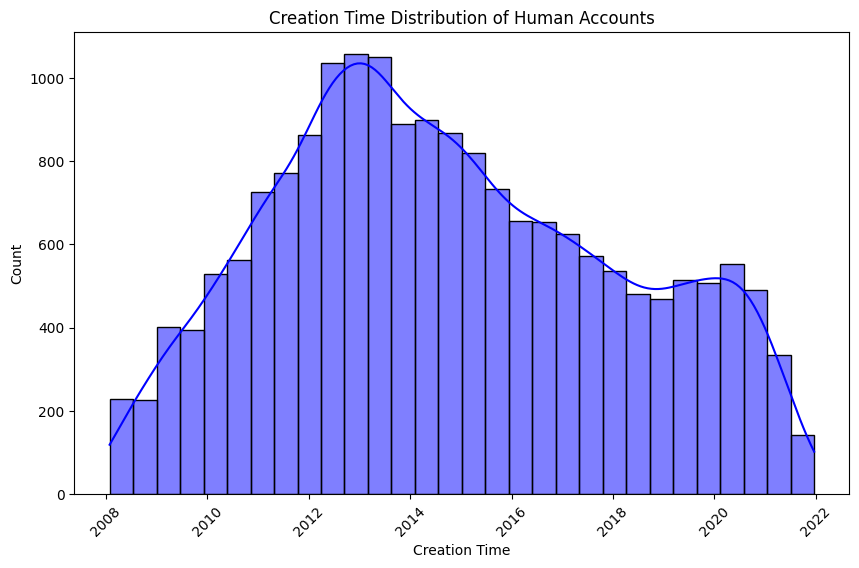

In [20]:
# 筛选出 Human 类型账号
human_data = data_cleaned[data_cleaned['label'] == 'Human']

# 绘制 Human 类型账号的创建时间分布
plt.figure(figsize=(10, 6))
sns.histplot(human_data['created_at'], kde=True, bins=30, color='blue')
plt.title('Creation Time Distribution of Human Accounts')  # 图表标题
plt.xlabel('Creation Time')  # x 轴标签
plt.ylabel('Count')  # y 轴标签
plt.xticks(rotation=45)  # 旋转 x 轴刻度标签
plt.show()


- 通过时间序列分布图 (带核密度估计)，帮助我们观察 Human 类型账号的创建趋势，是否有特定的时间分布规律。
- 图像发现2013年和2020年前后 Human 账号的创建量显著增加。
- 通过分析 Human 账号的创建分布，发现某些特殊年度或季节活动活动、促销等因素可能会导致注册量增加。

- 4.4 可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

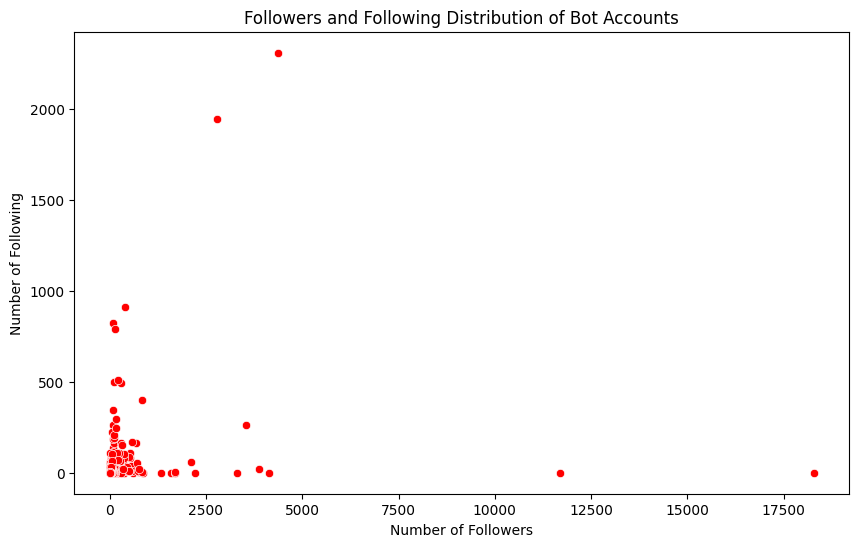

In [23]:
# 绘制 Bot 类型账号的 followers 和 following 数量的散点图
plt.figure(figsize=(10, 6))
sns.scatterplot(x=bot_data['followers'], y=bot_data['following'], color='red')
plt.title('Followers and Following Distribution of Bot Accounts')  # 图表标题
plt.xlabel('Number of Followers')  # x 轴标签
plt.ylabel('Number of Following')  # y 轴标签
plt.show()


- 散点图：散点图能够直观地展示 followers 和 following 数量的关系，帮助我们了解是否存在显著的相关性或规律。
- 图像表明大部分用户的关注与被关注量均较小，在500以下，关注与被关注较均衡；有少数用户被关注量高，再1w以上，少数用户关注与被关注均在2k左右。
- 一些 Bot 账号的 followers 和 following 数量非常高，表明这些账号可能用于自动化推送、关注等行为。

- 4.5 可视化human类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

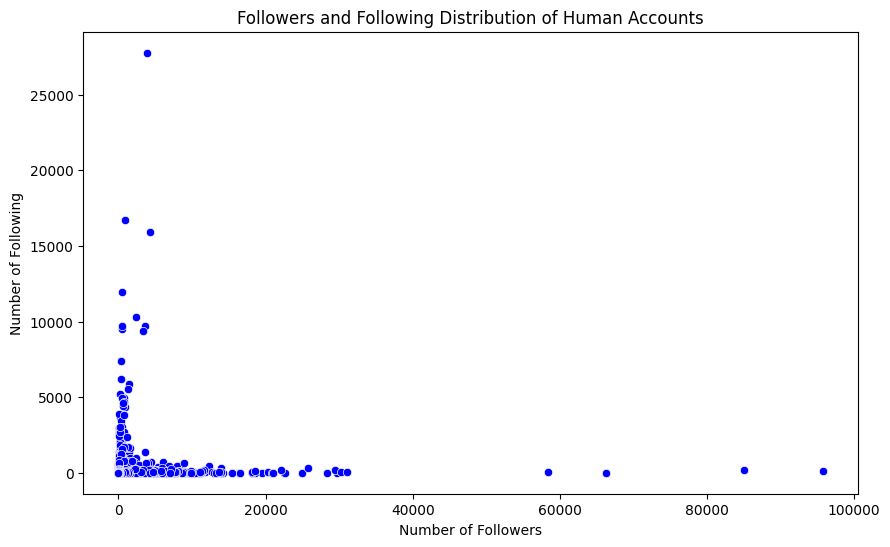

In [24]:
# 绘制 Human 类型账号的 followers 和 following 数量的散点图
plt.figure(figsize=(10, 6))
sns.scatterplot(x=human_data['followers'], y=human_data['following'], color='blue')
plt.title('Followers and Following Distribution of Human Accounts')  # 图表标题
plt.xlabel('Number of Followers')  # x 轴标签
plt.ylabel('Number of Following')  # y 轴标签
plt.show()


- 散点图：散点图能够直观地展示 followers 和 following 数量的关系，帮助我们了解是否存在显著的相关性或规律。同时通过散点图我们可以观察到 Human 类型账号之间在社交互动方面的差异。
- Human 账号的散点图呈现L型，这与坐标轴单位长度有关，但也表明大部分用户关注与被关注的用户间差异大。
- 通过分析 Human 类型账号的社交行为模式，发现follower多的少数账号following少，可能主要以发布内容为主，following很多的少数账号follower少，以观看为主。大部分用户互动较好。